In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos,sin, asin,sqrt

#reading the csv file
fl=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

#converting the datatype of date from object to datetime
fl['date_time_of_pickup']=pd.to_datetime(fl['date_time_of_pickup'])
fl.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
fl.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [ ]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [ ]:
fl.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [ ]:
#there are no null items in the given dataset , so we can move to the next phase of visualization
fl.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [ ]:
#calculating the distace between 2 points of a sphere by using using Haversine Formula
def distance(lon1, lon2, lat1 , lat2):
    
    
    lon1 =radians(lon1)
    lon2 =radians(lon2)
    lat1 =radians(lat1)
    lat2 =radians(lat2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371
    return(round (c * r, 2))
    
    
d = []
for i in range(fl.shape[0]):
    d.append(distance(fl["longitude_of_pickup"][i],
                      fl["longitude_of_dropoff"][i],
                      fl["latitude_of_pickup"][i],
                      fl["latitude_of_dropoff"][i]))
d

[1.03,
 8.45,
 1.39,
 2.8,
 2.0,
 3.79,
 1.56,
 4.16,
 1.25,
 2.85,
 1.37,
 0.0,
 0.72,
 2.02,
 1.67,
 0.0,
 2.61,
 1.51,
 0.92,
 0.4,
 1.69,
 2.29,
 0.92,
 1.4,
 1.02,
 2.53,
 0.0,
 0.33,
 4.07,
 0.81,
 0.87,
 6.7,
 9.4,
 1.38,
 7.15,
 12.78,
 0.81,
 0.95,
 2.34,
 3.59,
 1.64,
 5.01,
 5.75,
 5.46,
 0.95,
 2.55,
 0.99,
 0.46,
 0.55,
 1.65,
 2.5,
 1.01,
 2.29,
 0.21,
 11.6,
 5.04,
 9.63,
 1.69,
 6.35,
 1.27,
 0.43,
 1.23,
 0.98,
 1.45,
 2.19,
 1.62,
 1.11,
 3.73,
 3.37,
 0.83,
 0.92,
 0.84,
 1.06,
 1.2,
 5.4,
 3.42,
 1.49,
 12.5,
 2.35,
 1.93,
 1.57,
 0.83,
 1.49,
 5.9,
 2.53,
 1.65,
 5.12,
 2.52,
 1.75,
 0.59,
 4.0,
 2.22,
 1.99,
 1.3,
 2.23,
 3.21,
 1.42,
 1.49,
 3.5,
 1.31,
 2.44,
 1.18,
 4.21,
 6.14,
 0.75,
 0.0,
 4.07,
 3.31,
 2.93,
 0.57,
 2.04,
 2.01,
 7.6,
 1.49,
 2.96,
 1.11,
 4.62,
 0.48,
 8.3,
 1.52,
 3.26,
 0.94,
 2.65,
 9.72,
 0.0,
 1.68,
 5.87,
 2.33,
 1.87,
 1.8,
 1.38,
 5.47,
 19.85,
 3.67,
 13.33,
 3.14,
 1.27,
 0.71,
 1.79,
 6.37,
 2.9,
 2.08,
 3.76,
 2.75,
 1.79,
 2.1

In [ ]:
#adding it to the dataframe as a column
fl['distance in kms']=d
fl.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance in kms
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.03
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.45
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.39
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.80
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2.00


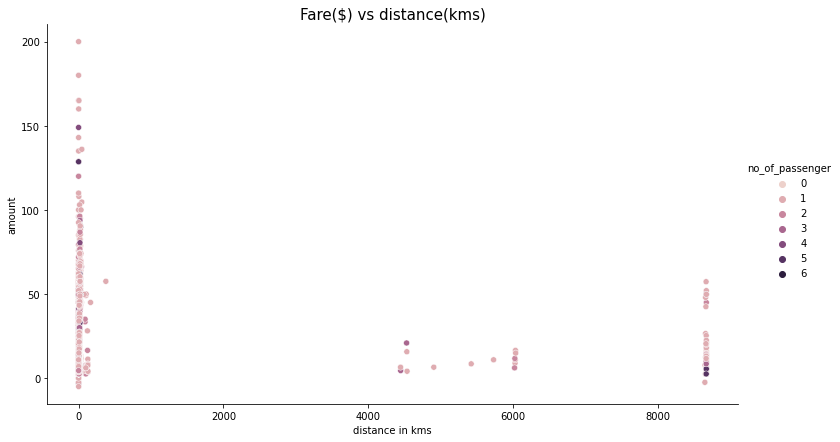

In [ ]:
#checking the data visually
sns.relplot(data = fl, kind = "scatter",x = "distance in kms",y = "amount",
            hue = "no_of_passenger",height=6 ,aspect = 1.75,)
plt.title("Fare($) vs distance(kms)" , fontsize=15)
plt.show()

In [ ]:
''' the data given has some anamoly where the amount is less when the 
distance travelled is more . you can see it in the above mentioned graph
especially around the distances more than apporximately a 100km'''
'''note: i have tried to model with the given data itself , but the model
score turns out to be really really low 0.0006 and hence i have
considered that the given data for a few columns greater than 100 km
is wrong and i have decided to just ignore those particular lines
of data.'''
'Removing anamolous data'
fl=fl[fl['distance in kms']<100]

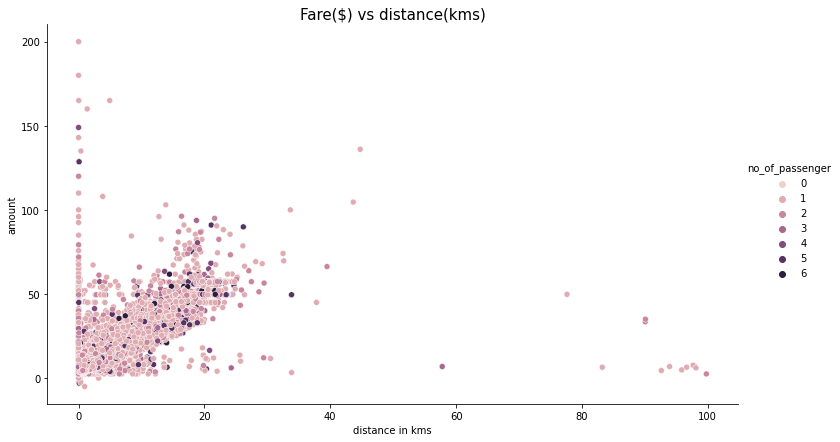

In [ ]:
#checking the data visually
sns.relplot(data = fl, kind = "scatter",x = "distance in kms",y = "amount",
            hue = "no_of_passenger",height=6 ,aspect = 1.75,)
plt.title("Fare($) vs distance(kms)" , fontsize=15)
plt.show()

In [ ]:
#similar reasoning we can remove the records with distance more than 50 km
fl=fl[fl['distance in kms']<50]

In [ ]:
#we can also remove the data with negative entries in amount
fl=fl[fl['amount']>0]

In [ ]:
#removing the entries with 0 passengers
fl=fl[fl['no_of_passenger']>0]

In [ ]:
#removing the entries with distance less than 0.1km
fl=fl[fl['distance in kms']>=0.1]

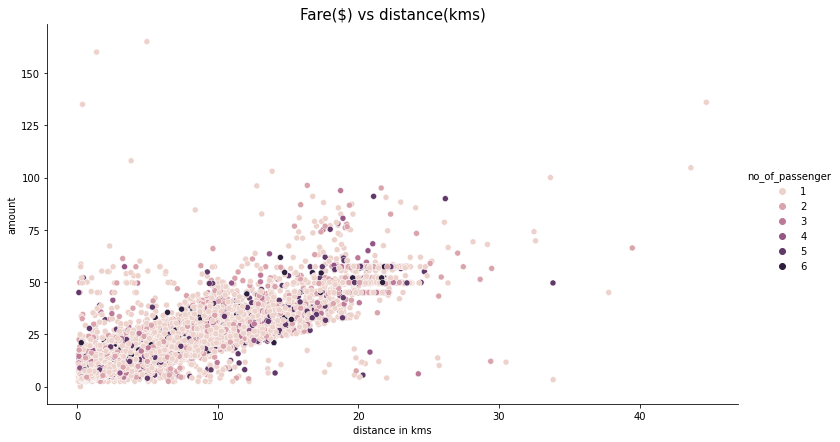

In [ ]:
#checking the data visually
sns.relplot(data = fl, kind = "scatter",x = "distance in kms",y = "amount",
            hue = "no_of_passenger",height=6 ,aspect = 1.75,)
plt.title("Fare($) vs distance(kms)" , fontsize=15)
plt.show()

In [ ]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47971 entries, 0 to 49998
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             47971 non-null  object             
 1   amount                47971 non-null  float64            
 2   date_time_of_pickup   47971 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   47971 non-null  float64            
 4   latitude_of_pickup    47971 non-null  float64            
 5   longitude_of_dropoff  47971 non-null  float64            
 6   latitude_of_dropoff   47971 non-null  float64            
 7   no_of_passenger       47971 non-null  int64              
 8   distance in kms       47971 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1), object(1)
memory usage: 4.7+ MB


In [ ]:
fl.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance in kms
count,47971.000000,47971.000000,47971.000000,47971.000000,47971.000000,47971.000000,47971.000000
mean,11.318777,-73.929575,40.713693,-73.928308,40.706727,1.677347,3.388432
std,9.340931,2.272874,2.777338,2.273032,2.237594,1.291446,3.602607
min,0.010000,-75.414728,-74.006893,-75.354559,-74.001000,1.000000,0.100000
25%,6.000000,-73.992326,40.736541,-73.991330,40.735936,1.000000,1.300000
50%,8.500000,-73.982147,40.753459,-73.980515,40.754148,1.000000,2.200000
75%,12.500000,-73.968558,40.767785,-73.965567,40.768509,2.000000,3.990000
max,165.000000,40.783472,401.083332,40.851027,42.168717,6.000000,44.750000


In [ ]:
#we can also remove the data with entries in amount<0.1 dollars
fl=fl[fl['amount']>0.1]

In [ ]:
fl.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance in kms
count,47970.000000,47970.000000,47970.000000,47970.000000,47970.000000,47970.000000,47970.000000
mean,11.319013,-73.929575,40.713693,-73.928307,40.706727,1.677361,3.388498
std,9.340886,2.272898,2.777367,2.273056,2.237617,1.291456,3.602616
min,2.500000,-75.414728,-74.006893,-75.354559,-74.001000,1.000000,0.100000
25%,6.000000,-73.992326,40.736544,-73.991331,40.735937,1.000000,1.300000
50%,8.500000,-73.982147,40.753461,-73.980516,40.754148,1.000000,2.200000
75%,12.500000,-73.968559,40.767785,-73.965570,40.768510,2.000000,3.990000
max,165.000000,40.783472,401.083332,40.851027,42.168717,6.000000,44.750000


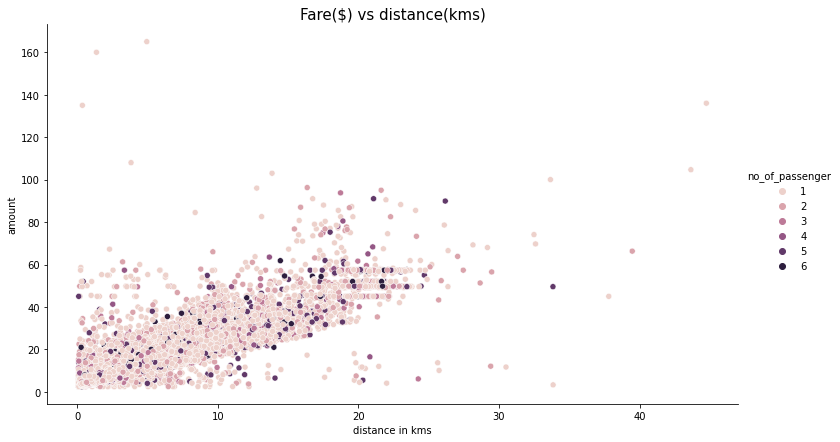

In [ ]:
#checking the data visually
sns.relplot(data = fl, kind = "scatter",x = "distance in kms",y = "amount",
            hue = "no_of_passenger",height=6 ,aspect = 1.75,)
plt.title("Fare($) vs distance(kms)" , fontsize=15)
plt.show()

In [ ]:
#dropping unwanted columns
fl.drop(["latitude_of_pickup",
                      "latitude_of_dropoff",
                      "longitude_of_pickup",
                      "longitude_of_dropoff"],inplace=True,axis=1)

In [ ]:
fl.drop(['date_time_of_pickup'],axis=1,inplace=True)
fl.drop(['unique_id'],axis=1,inplace=True)

In [ ]:
fl.head()

,amount,no_of_passenger,distance in kms
0,4.5,1,1.03
1,16.9,1,8.45
2,5.7,2,1.39
3,7.7,1,2.80
4,5.3,1,2.00


In [ ]:
#splitting amount and distance
x=fl.iloc[:,1:]
y=fl.iloc[:,0]

In [ ]:
x

,no_of_passenger,distance in kms
0,1,1.03
1,1,8.45
2,2,1.39
3,1,2.80
4,1,2.00
...,...,...
49994,1,2.29
49995,1,4.94
49996,1,0.87
49997,1,2.26


In [ ]:
y

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
49994     8.5
49995    15.0
49996     7.5
49997     6.9
49998     4.5
Name: amount, Length: 47970, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
#spitting data and training the model 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.33)
linreg = LinearRegression()
linreg.fit(x_train , y_train)
y_pred = linreg.predict(x_train)

In [ ]:
y_pred

array([18.01230303,  6.95585963,  7.42962219, ...,  6.60670879,
        5.23408592,  8.46884662])

In [ ]:
linreg.score(x_train,y_train)

0.8068002659128101

In [ ]:
linreg.score(x_test,y_test)

0.7973115807498377

In [ ]:
#training polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train2, y_train)

y_pred = poly_clf.predict(x_test2)

y_pred

array([ 6.9265975 , 10.24168338,  9.06868082, ...,  5.60519963,
       10.10258887,  6.25430736])

In [ ]:
poly_clf.score(x_train2, y_train)

0.8068424086682637

In [ ]:
poly_clf.score(x_test2, y_test)

0.7971716009466723

In [ ]:
from sklearn.tree import DecisionTreeRegressor
treereg=DecisionTreeRegressor(criterion="friedman_mse",max_depth=3)
treereg.fit(x_train,y_train)
y_predict=treereg.predict(x_test)
y_predict

array([5.88364479, 8.62420749, 8.62420749, ..., 5.88364479, 8.62420749,
       5.88364479])

In [ ]:
treereg.score(x_train,y_train)

0.7994292384100925

In [ ]:
treereg.score(x_test,y_test)

0.785225050613604

In [ ]:
from sklearn.ensemble import BaggingRegressor
bagreg=BaggingRegressor(n_estimators=100)
bagreg.fit(x_train,y_train)
y_predit=bagreg.predict(x_test)
y_predit

array([ 6.71330358, 10.02714312,  8.47246506, ...,  5.42265637,
        9.77565051,  6.46466123])

In [ ]:
bagreg.score(x_train,y_train)

0.8753864031183229

In [ ]:
bagreg.score(x_test,y_test)

0.7631009567307734

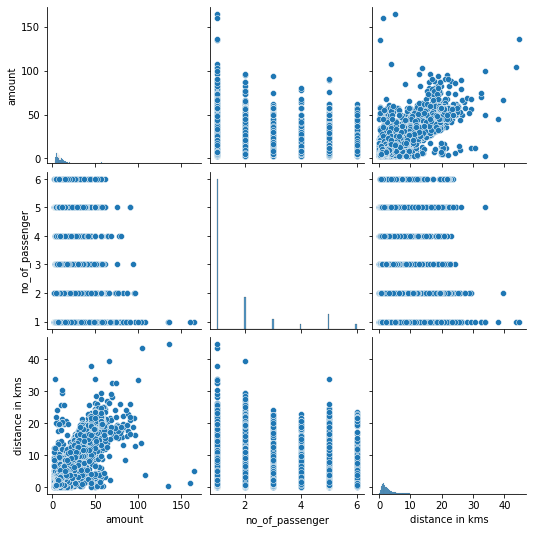

In [ ]:
sns.pairplot(fl)